In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn import linear_model,svm,ensemble,tree

# special matplotlib argument for improved plots
from matplotlib import rcParams

import samples
reload(samples)
import spectral
reload(spectral)
import audiolearning
reload(audiolearning)
import mytimer as mt
reload(mt)
print

In [9]:
FFT_BINS = 60;
FWIN = 25;
TWIN = 1;
NPERSEG = 1024;
TSUB = 1; #NOTE: this will be used only for training. Will experiment with test format later.
NSUB = 10;
#Last day of 'training' data
MONTH = 6;
DAY = 5;

In [10]:
data_file = 'sped_mfccPhi_%02i%02i_%i_%i_%i_%i_%i_%i.pkl'%(MONTH,DAY,TSUB,NSUB,FFT_BINS,FWIN,TWIN,NPERSEG)
LOAD_DATA = True;

In [11]:
class phi_sped_mfcc:
    LEN = 0;
    def __init__(self,fft_bins):
        #self.LEN = fft_bins;
        self.LEN = fft_bins+13;
        self.fft_bins = fft_bins;

    def get_phi(self,sample):
        '''
        Takes in a super_sample and returns a feature array. Breaks the super_sample
        down into samples. Each row of the returned value corresponds to a sample
        in the super sample.
        '''

        XSPED = spectral.getSupersampleSPED(sample,self.fft_bins,fwin=FWIN,twin = TWIN,nperseg = NPERSEG,spacing="log")
        XMFCC = spectral.getSampleMFCC(sample)
        return np.hstack((XMFCC,XSPED))

In [12]:
myPhi = phi_sped_mfcc(FFT_BINS)
extractor = audiolearning.Classifier(myPhi)

In [13]:
if os.path.exists(data_file):
    with open(data_file,"rb") as myPkl:
        thisData = pickle.load(myPkl);
        X = thisData.X_flat;
        Y = thisData.Y_flat;
        X_compact = thisData.X
        Y_compact = thisData.Y
    m, nsub, nfeat = np.shape(X_compact)
else:
    all_samples = samples.getAllSamples(Tsub=TSUB,Nsub=NSUB,READ_IN=False)
    (X_compact,Y_compact) = extractor.extract_features(all_samples)
    m, nsub, nfeat = np.shape(X_compact)
    X = np.reshape(X_compact,(m*nsub,nfeat))
    Y = np.repeat(Y_compact,nsub)
    thisData = samples.DataPhi()
    thisData.X = X_compact
    thisData.Y = Y_compact
    thisData.X_flat = X
    thisData.Y_flat = Y
    with open(data_file,'wb') as f:
        pickle.dump(thisData,f)

Imported 1507 Supersamples


(array([ 1440.,  1500.,  1500.,  1620.,  1620.,  1320.,  1500.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

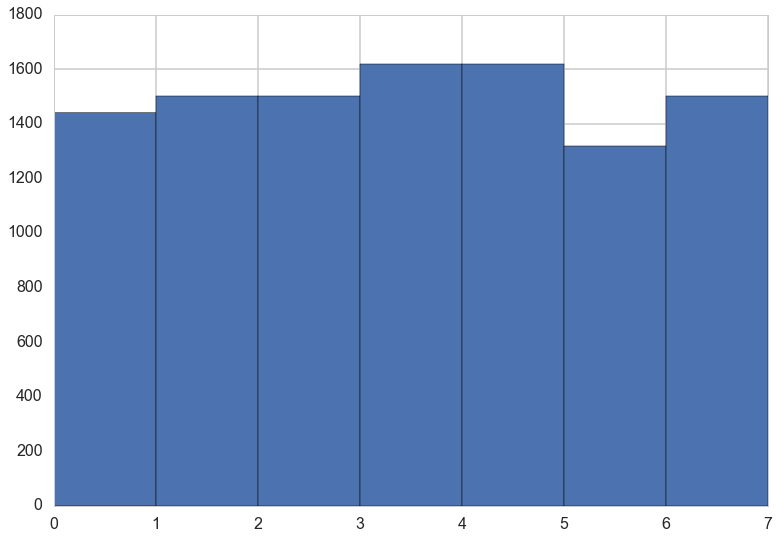

In [7]:
plt.hist(Y,range(8))

In [8]:
mfcc_names =  ['MFCC' + str(i) for i in range(13)]
sped_names = ['SPED_Bin' + str(i) for i in range(FFT_BINS)]
col_names = mfcc_names + sped_names
X_df = pd.DataFrame(X)
X_df.columns = col_names
X_df['REGION'] = Y
X_df.head()

MFCC0     MFCC1     MFCC2     MFCC3     MFCC4     MFCC5     MFCC6  \
0 -25.918079 -0.008070  0.172488 -0.140354  0.329311 -0.029216  0.140779   
1 -25.966328 -0.258913  0.292604 -0.070700  0.162208 -0.072497  0.106541   
2 -25.957831 -0.204486  0.295049 -0.052674  0.266495 -0.084051  0.187803   
3 -25.973699 -0.073244  0.306785 -0.087720  0.280578 -0.085753  0.211136   
4 -26.030975 -0.106581  0.374309 -0.119022  0.298362 -0.053834  0.153209   

      MFCC7     MFCC8     MFCC9   ...    SPED_Bin51  SPED_Bin52  SPED_Bin53  \
0  0.003680  0.086454 -0.048726   ...            12          16          12   
1 -0.074517 -0.013643 -0.024632   ...            15          13          15   
2 -0.044129  0.026562 -0.042559   ...            14          11          14   
3 -0.120926 -0.012469 -0.061531   ...            13          13          16   
4 -0.174730  0.100719 -0.128079   ...            14          19          15   

   SPED_Bin54  SPED_Bin55  SPED_Bin56  SPED_Bin57  SPED_Bin58  SPED_Bin59  \
0          19          14          18          18          19          11   
1          18          15          21          18          17          13   
2          15          19          19          16          21           8   
3          12          18          19          16          15          16   
4          12          20          21          15          27          14   

   REGION  
0       6  
1       6  
2       6  
3       6  
4       6  

[5 rows x 74 columns]

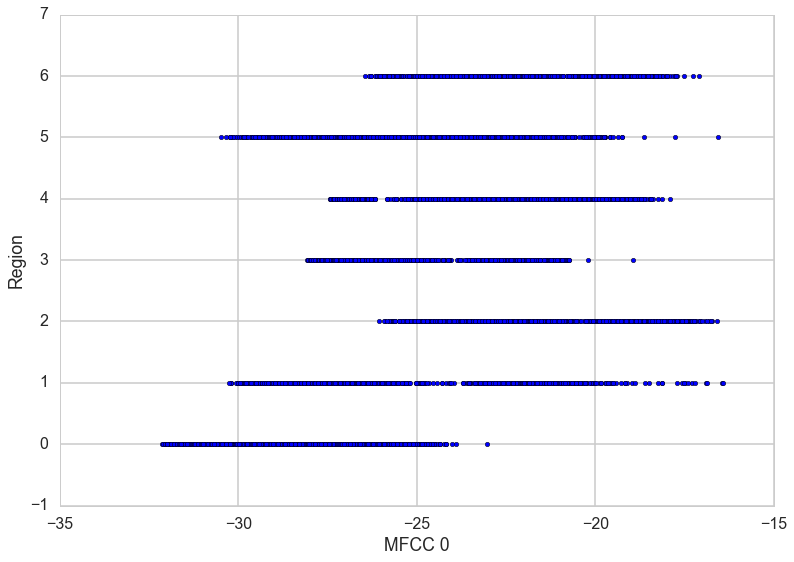

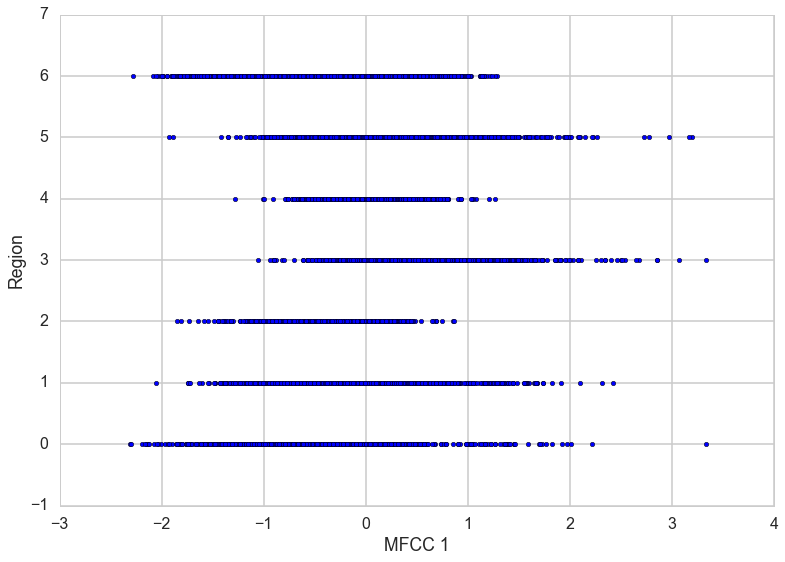

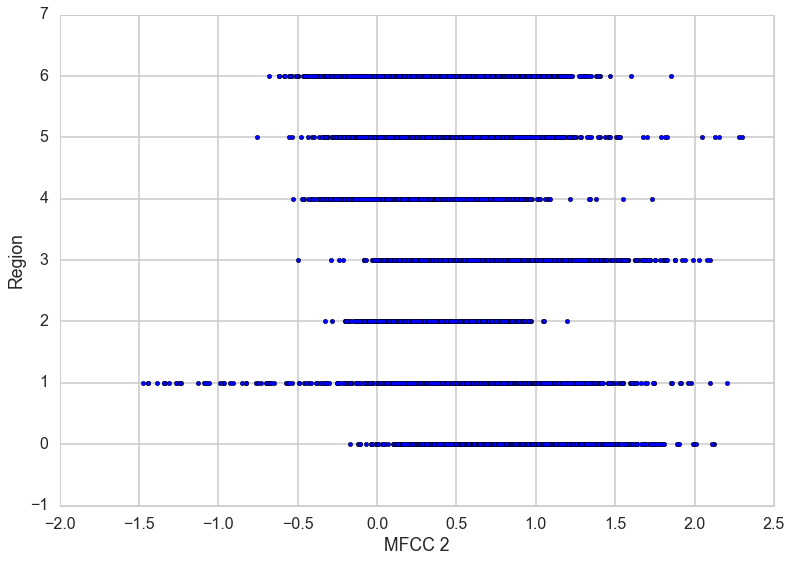

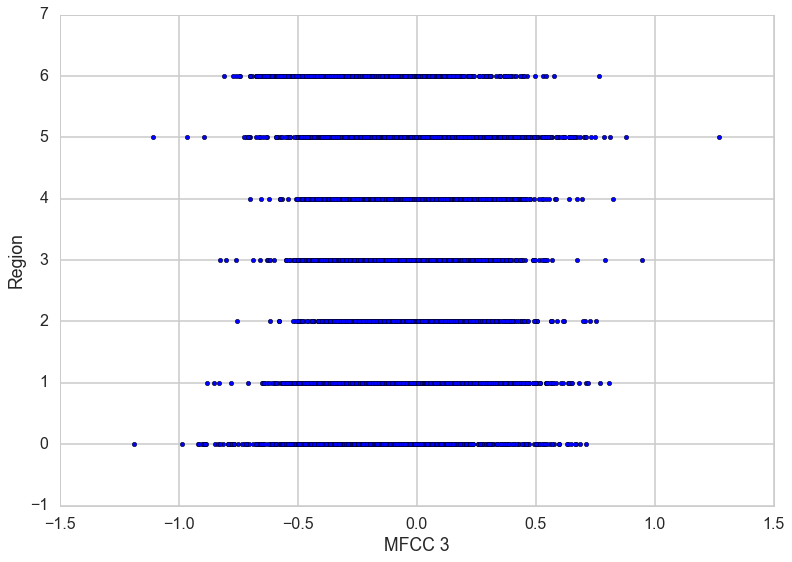

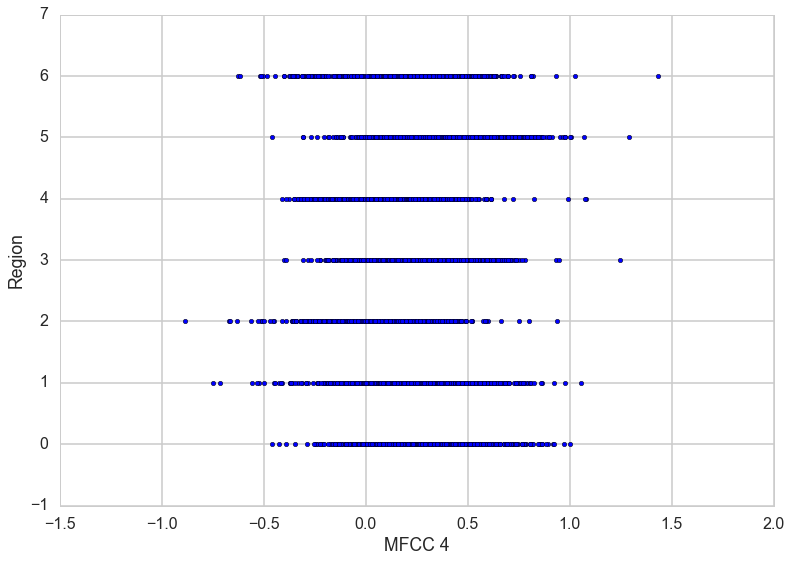

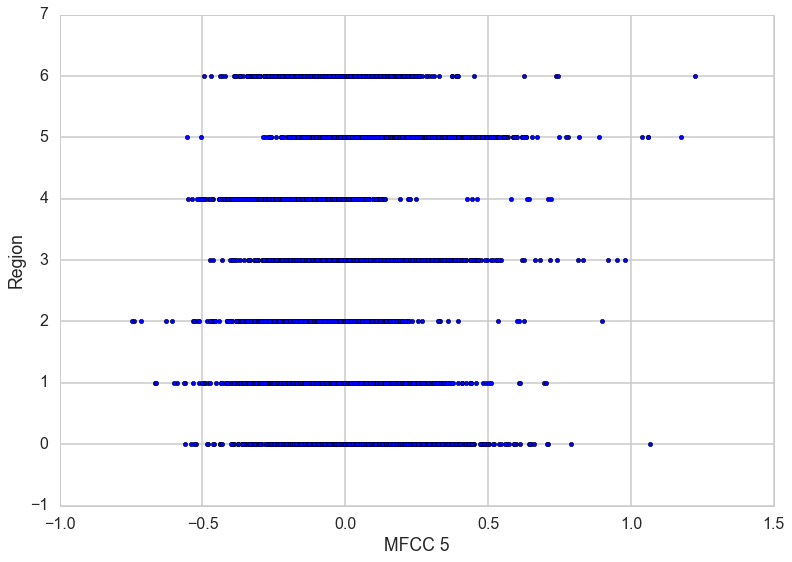

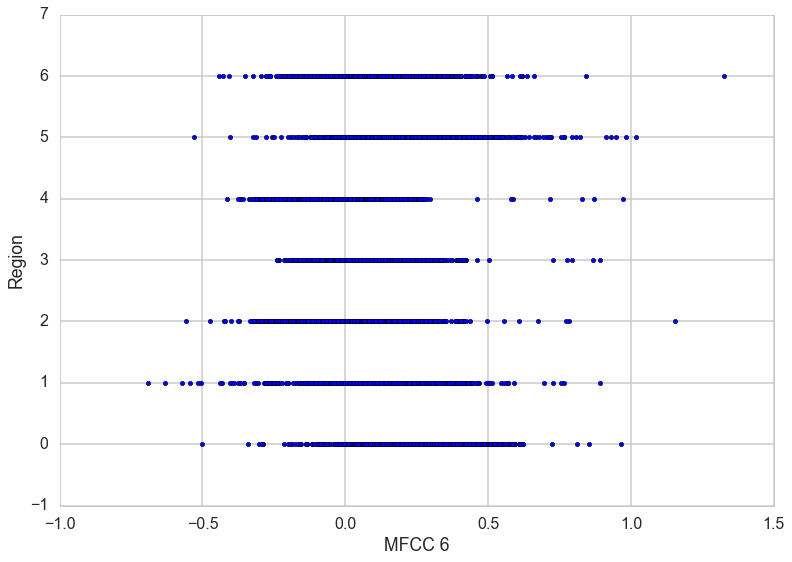

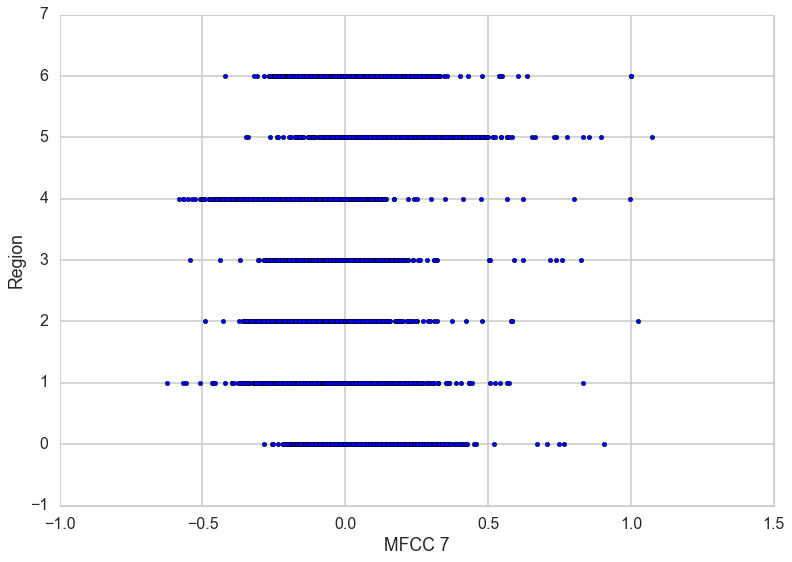

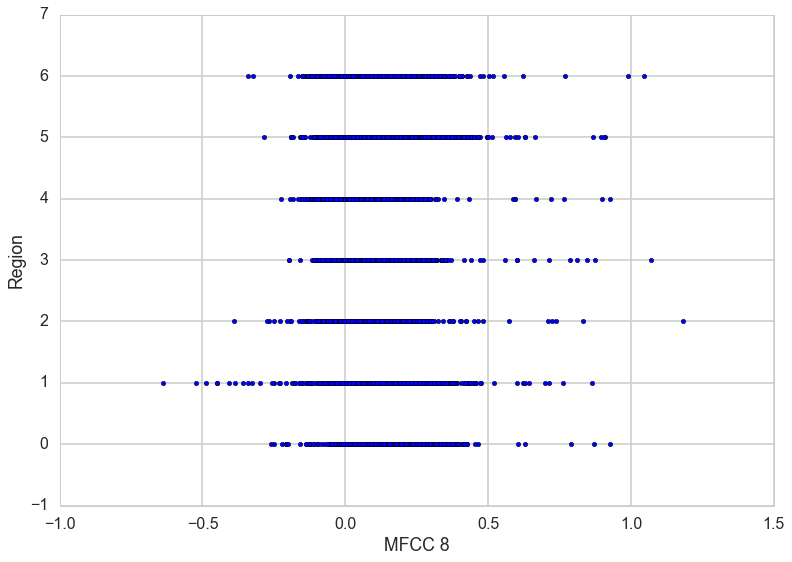

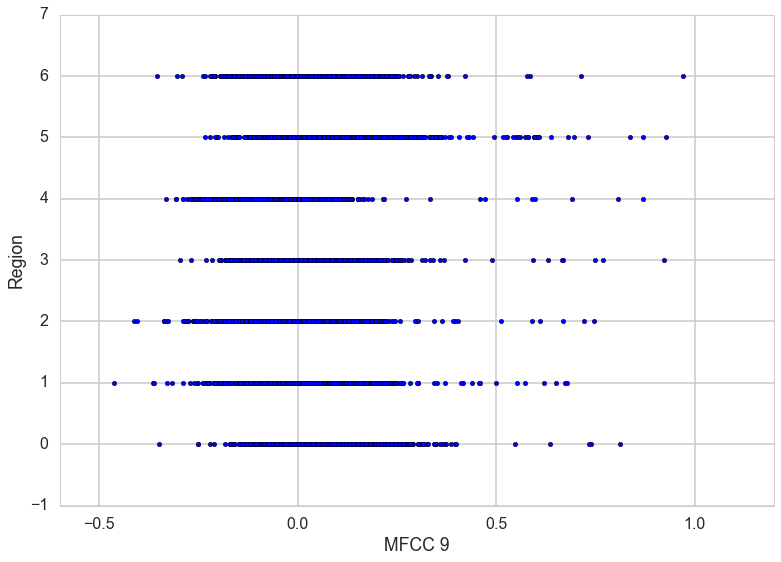

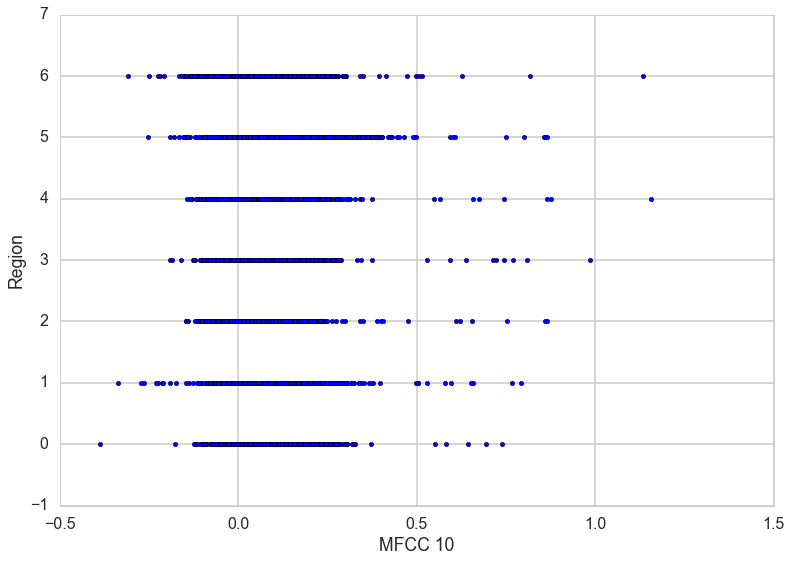

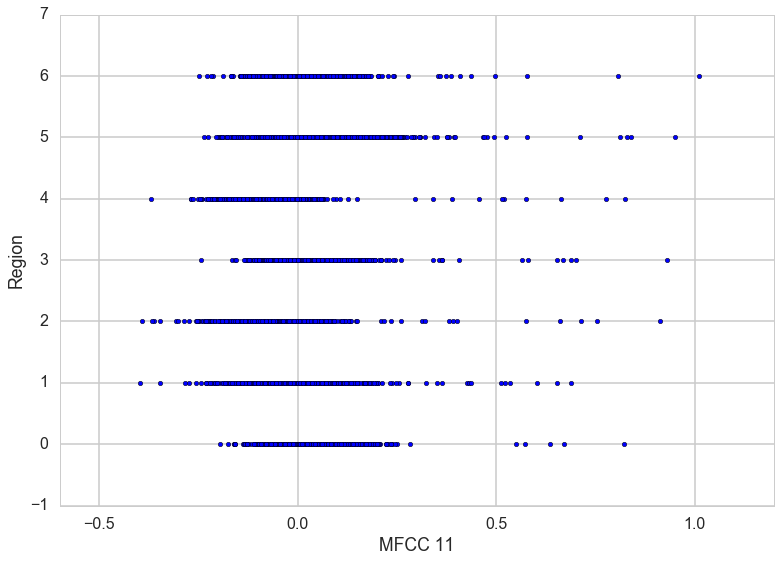

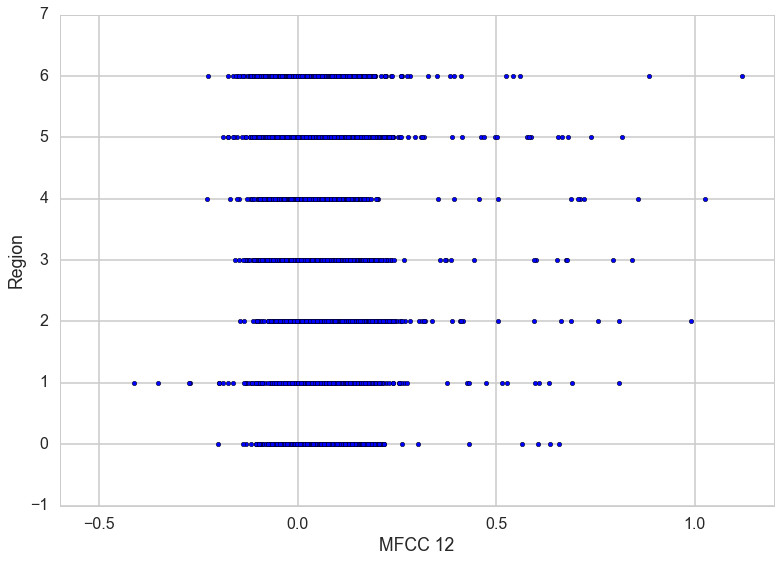

In [9]:
for i in range(13):
    plt.scatter(X_df['MFCC'+str(i)],X_df['REGION'])
    plt.xlabel("MFCC " + str(i))
    plt.ylabel("Region")
    plt.show()

In [10]:
classes = X_df.groupby('REGION')

In [11]:
classes.describe()

MFCC0        MFCC1       MFCC10       MFCC11       MFCC12  \
REGION                                                                          
0      count  1440.000000  1440.000000  1440.000000  1440.000000  1440.000000   
       mean    -28.710222    -0.453511     0.121484     0.048121     0.073606   
       std       2.039841     0.604384     0.079476     0.074865     0.063850   
       min     -32.126347    -2.307413    -0.387417    -0.195779    -0.199860   
       25%     -30.310252    -0.786060     0.074131     0.002986     0.038636   
       50%     -29.269616    -0.494802     0.120372     0.043470     0.074370   
       75%     -26.941136    -0.150814     0.167881     0.089188     0.106380   
       max     -23.031964     3.338607     0.740045     0.822839     0.659298   
1      count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       mean    -25.146364    -0.109431     0.107545     0.008569     0.061112   
       std       3.152316     0.631695     0.091190     0.084152     0.076168   
       min     -30.248800    -2.056050    -0.337738    -0.396665    -0.413135   
       25%     -27.898210    -0.569019     0.056590    -0.034719     0.020405   
       50%     -26.303659    -0.142408     0.106993     0.007141     0.059803   
       75%     -22.065569     0.291248     0.154541     0.049933     0.098981   
       max     -16.427706     2.418469     0.792990     0.687720     0.810613   
2      count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       mean    -21.332788    -0.359406     0.054338    -0.030076     0.060764   
       std       2.357703     0.369527     0.079817     0.084187     0.077762   
       min     -26.050930    -1.851440    -0.146003    -0.391856    -0.144843   
       25%     -23.252129    -0.581128     0.011003    -0.070093     0.017164   
       50%     -22.038172    -0.360485     0.048805    -0.025370     0.051226   
       75%     -19.101203    -0.103730     0.090448     0.010487     0.092612   
       max     -16.594068     0.868365     0.864909     0.914093     0.991336   
3      count  1620.000000  1620.000000  1620.000000  1620.000000  1620.000000   
       mean    -24.756567     0.663457     0.077178     0.019666     0.036722   
       std       2.247832     0.508386     0.085294     0.079070     0.076038   
       min     -28.079655    -1.057673    -0.191070    -0.244690    -0.159195   
       25%     -26.917636     0.369642     0.031152    -0.026489    -0.004400   
       50%     -25.151508     0.718886     0.067631     0.007109     0.032391   
       75%     -22.629139     0.952795     0.116688     0.053067     0.068483   
       max     -18.955462     3.332494     0.986220     0.929688     0.841964   
4      count  1620.000000  1620.000000  1620.000000  1620.000000  1620.000000   
       mean    -22.897980     0.139808     0.077005    -0.055633     0.034290   
       std       2.874067     0.284371     0.083472     0.078931     0.071257   
       min     -27.423530    -1.281678    -0.142084    -0.369688    -0.228190   
       25%     -26.273039     0.018036     0.031868    -0.101783     0.000472   
       50%     -22.705815     0.182586     0.073276    -0.048710     0.032564   
       75%     -20.182395     0.290998     0.114139    -0.012266     0.063128   
       max     -17.914661     1.263707     1.156533     0.824655     1.027061   
5      count  1320.000000  1320.000000  1320.000000  1320.000000  1320.000000   
       mean    -25.158859     0.169476     0.139065     0.071907     0.073442   
       std       2.496533     0.630593     0.111951     0.105545     0.087700   
       min     -30.474040    -1.925078    -0.251472    -0.237191    -0.187783   
       25%     -27.114985    -0.238712     0.071064     0.015604     0.030195   
       50%     -24.934673     0.086134     0.136859     0.070902     0.070459   
       75%     -23.649136     0.497748     0.196330     0.123319     0.112956   
       max     -16.567036     3.198728     0.865331

In [12]:
classes.get_group(0).head()

MFCC0     MFCC1    MFCC10    MFCC11    MFCC12     MFCC2     MFCC3  \
7560 -26.873158 -0.653411  0.208576 -0.008484  0.055788  0.373997 -0.435972   
7561 -26.921664 -0.628503  0.188995  0.029489  0.120771  0.454278 -0.296170   
7562 -26.634897 -0.567841  0.248900  0.087849  0.109637  0.605595 -0.318652   
7563 -26.580003 -0.554923  0.168907  0.076883  0.145709  0.702235 -0.219895   
7564 -26.611434 -0.609800  0.250711  0.037579  0.171509  0.610626 -0.256571   

         MFCC4     MFCC5     MFCC6    ...      SPED_Bin54  SPED_Bin55  \
7560  0.135274 -0.171036 -0.001735    ...              12          15   
7561  0.311315 -0.094074  0.078612    ...              16          15   
7562  0.329879  0.035038  0.085161    ...              12          13   
7563  0.380643 -0.041731  0.020338    ...              12          19   
7564  0.264436 -0.020244 -0.005966    ...              14          17   

      SPED_Bin56  SPED_Bin57  SPED_Bin58  SPED_Bin59  SPED_Bin6  SPED_Bin7  \
7560          13          20          17          12          0          0   
7561          17          17          17          12          0          0   
7562          15          14          21          13          0          0   
7563          15          16          18          13          0          0   
7564          14          20          20          11          0          0   

      SPED_Bin8  SPED_Bin9  
7560          1          2  
7561          0          0  
7562          0          0  
7563          0          0  
7564          0          0  

[5 rows x 73 columns]

In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

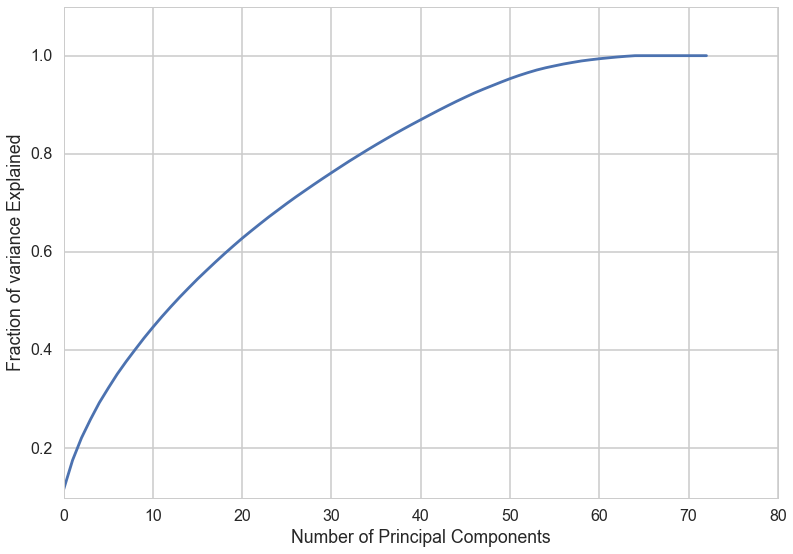

In [14]:
pca = PCA(n_components=None)

X_pca = pca.fit_transform(preprocessing.scale(X),Y)
var_thresh = 0.95
var_exp = pca.explained_variance_ratio_.cumsum()
plt.plot(var_exp)
num_pcs = np.where(var_exp>=var_thresh)[0][0]
plt.xlabel('Number of Principal Components')
plt.ylabel('Fraction of variance Explained')
print

In [15]:
#num_pcs = len(var_exp)
print "Number of Principal Components to explain %.2f%% of variance: %d" %(var_thresh*100,num_pcs)
pca.set_params(n_components=num_pcs)

Number of Principal Components to explain 95.00% of variance: 50


PCA(copy=True, n_components=50, whiten=False)

In [16]:
pca_df = pd.DataFrame()

for i in range(num_pcs):
    pca_df["pc%i" % (i+1)] = X_pca[:,i]
    
pca_df['REGION'] = Y
pca_classes = pca_df.groupby('REGION')
pca_classes.describe()

pc1         pc10         pc11         pc12         pc13  \
REGION                                                                          
0      count  1440.000000  1440.000000  1440.000000  1440.000000  1440.000000   
       mean     -1.987345    -0.458179     0.332942    -0.173418    -0.248252   
       std       1.573615     1.026489     0.950922     0.748954     0.930127   
       min     -12.712900    -4.897413    -5.494643    -3.393681    -3.416501   
       25%      -2.855850    -1.015709    -0.216711    -0.614257    -0.811384   
       50%      -2.010266    -0.482784     0.347214    -0.152266    -0.235025   
       75%      -1.275195     0.145794     0.920142     0.245318     0.316371   
       max       5.276644     4.024082     3.594878     3.755984     6.468341   
1      count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       mean     -0.507141    -0.395217    -0.116038     0.253738    -0.030899   
       std       2.035401     1.309376     1.203299     1.260565     1.163592   
       min     -12.317761    -5.351251    -8.516838   -12.833410    -5.676493   
       25%      -1.718027    -1.174980    -0.796932    -0.339726    -0.692457   
       50%      -0.820256    -0.450941    -0.096422     0.242203    -0.069391   
       75%       0.311875     0.243718     0.549292     0.855075     0.568738   
       max       9.856099     9.737663     6.677712     5.046712     6.603950   
2      count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       mean      2.205101    -0.107903     0.006243    -0.218341    -0.312400   
       std       1.846001     1.209532     1.206791     1.118118     1.072224   
       min     -10.952054    -4.159821    -4.480880    -7.164821    -5.091543   
       25%       1.072628    -0.905747    -0.736547    -0.918319    -0.975360   
       50%       2.038751    -0.101019    -0.017491    -0.236560    -0.324029   
       75%       3.310830     0.694313     0.766484     0.463220     0.316711   
       max       8.583922     5.768648     4.223216     4.256742     4.091660   
3      count  1620.000000  1620.000000  1620.000000  1620.000000  1620.000000   
       mean     -0.560350     0.227844    -0.073193     0.208485     0.096441   
       std       1.439185     0.970927     0.872396     0.891292     0.912999   
       min     -14.099187    -3.584529    -4.187541    -2.872155    -8.981282   
       25%      -1.412332    -0.375161    -0.563534    -0.278102    -0.355973   
       50%      -0.434537     0.167695    -0.054145     0.176464     0.154017   
       75%       0.325169     0.779991     0.430680     0.642142     0.596575   
       max       7.358205     9.983674     2.786660    10.334688     3.198190   
4      count  1620.000000  1620.000000  1620.000000  1620.000000  1620.000000   
       mean      3.343591     0.188859     0.096994     0.176537     0.217332   
       std       2.881042     1.382559     1.608075     1.088462     1.145168   
       min     -11.866444    -5.333924    -4.288420    -2.971477    -3.966324   
       25%       0.781856    -0.640358    -0.945535    -0.553304    -0.551834   
       50%       3.056073     0.091658     0.012786     0.166742     0.209876   
       75%       5.398005     1.043718     1.051798     0.857477     0.998562   
       max      10.838076     5.779176     5.803950     3.637869     5.266399   
5      count  1320.000000  1320.000000  1320.000000  1320.000000  1320.000000   
       mean     -2.528421     0.469507    -0.213835     0.005733    -0.002784   
       std       1.756002     1.243674     1.168438     1.273177     1.273899   
       min     -14.919570    -3.354150    -5.656717    -4.865158    -5.860359   
       25%      -3.488067    -0.403726    -0.874030    -0.793180    -0.641937   
       50%      -2.578015     0.357871    -0.172828    -0.083599     0.033651   
       75%      -1.649025     1.181316     0.526156     0.665642     0.680530   
       max       4.825776     5.416405     4.043694  

In [18]:
samples.REGIONS

['Rains', 'Circle', 'Tresidder', 'Huang', 'Bytes', 'Oval', 'Arrillaga']

In [19]:
def plotRegions(regions,dataframe,i=None,j=None):
    num = len(regions)
    colors = sns.color_palette("hls", 8)
    markers = ['^','o','x','v','<','>','*']
    fig =plt.figure()
    ax = Axes3D(fig,elev=-140, azim=80)
    if i==None:
        for region_name,color,marker in zip(regions,colors,markers):
            region = samples.Regions_dict[region_name]
            mask = pca_df['REGION']==region
            ax.scatter(pca_df[mask]['pc1'],pca_df[mask]['pc2'],pca_df[mask]['pc3'],c=color,label=region_name,marker=marker)
    else:
        region_name = samples.REGIONS[i]
        mask = pca_df['REGION']==i
        ax.scatter(pca_df[mask]['pc1'],pca_df[mask]['pc2'],pca_df[mask]['pc3'],c=colors[i],label=region_name,marker=markers[i])
        region_name = samples.REGIONS[j]
        mask = pca_df['REGION']==j
        ax.scatter(pca_df[mask]['pc1'],pca_df[mask]['pc2'],pca_df[mask]['pc3'],c=colors[j],label=region_name,marker=markers[j])


    plt.legend()
    plt.title('First 3 Principal Components')
    plt.show()

# Plotting All The Regions Together Based on the First 3 PCs is pretty messy

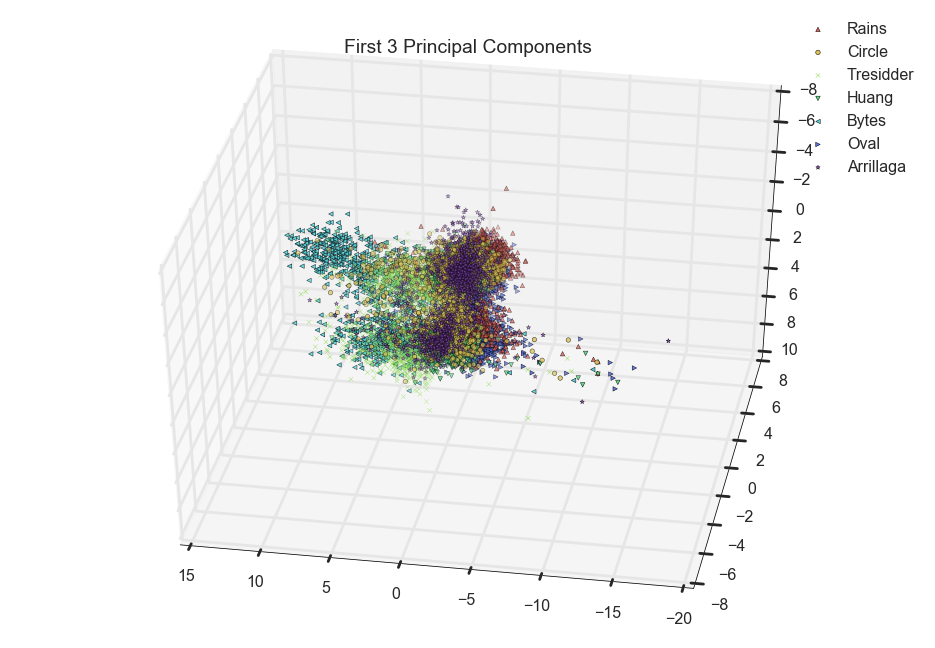

In [20]:
plotRegions(samples.REGIONS,pca_df)

# But Plotting Them Pairwise is Pretty Interesting

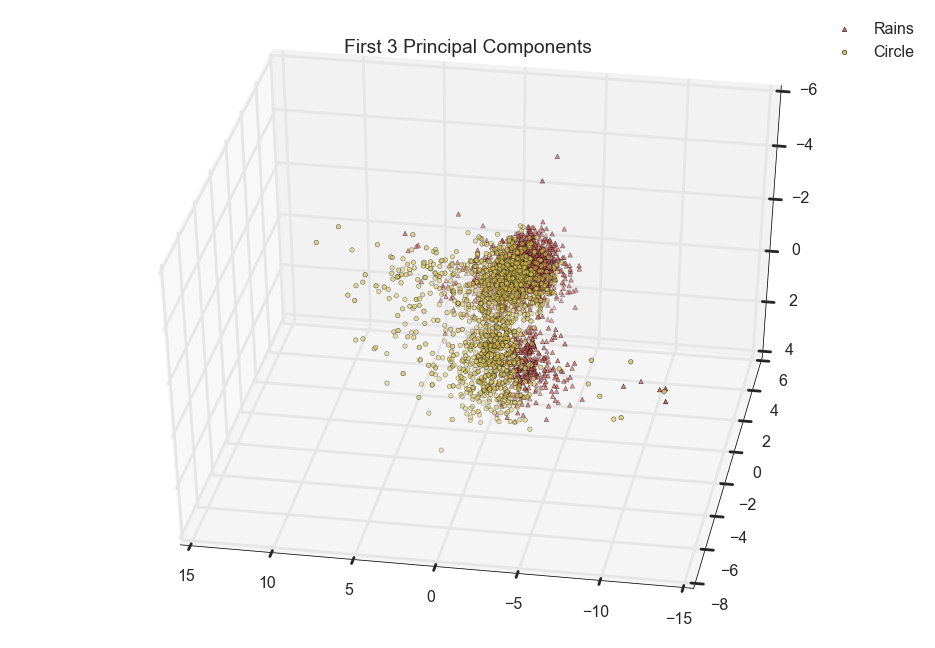

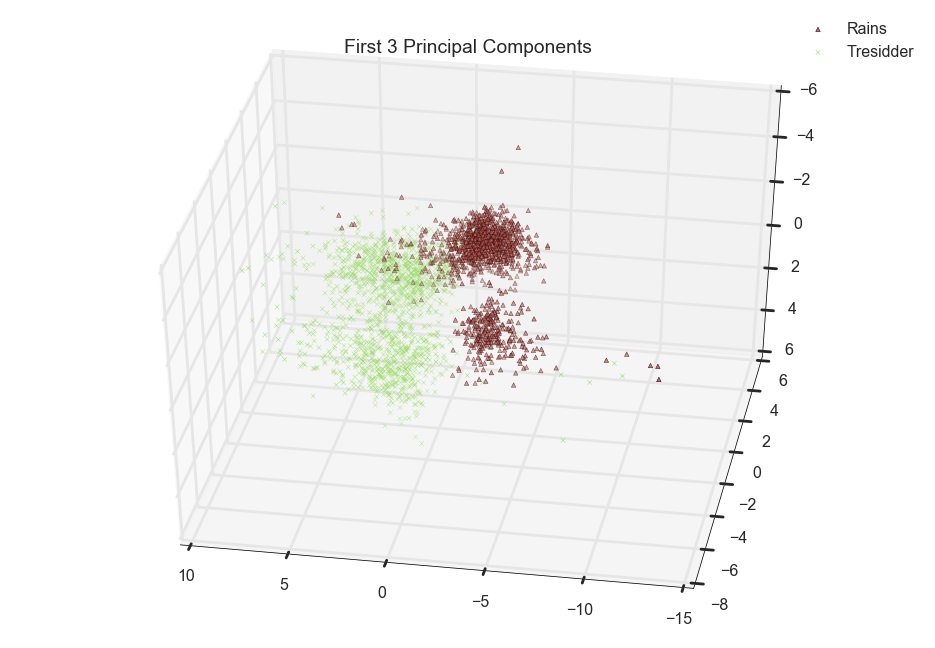

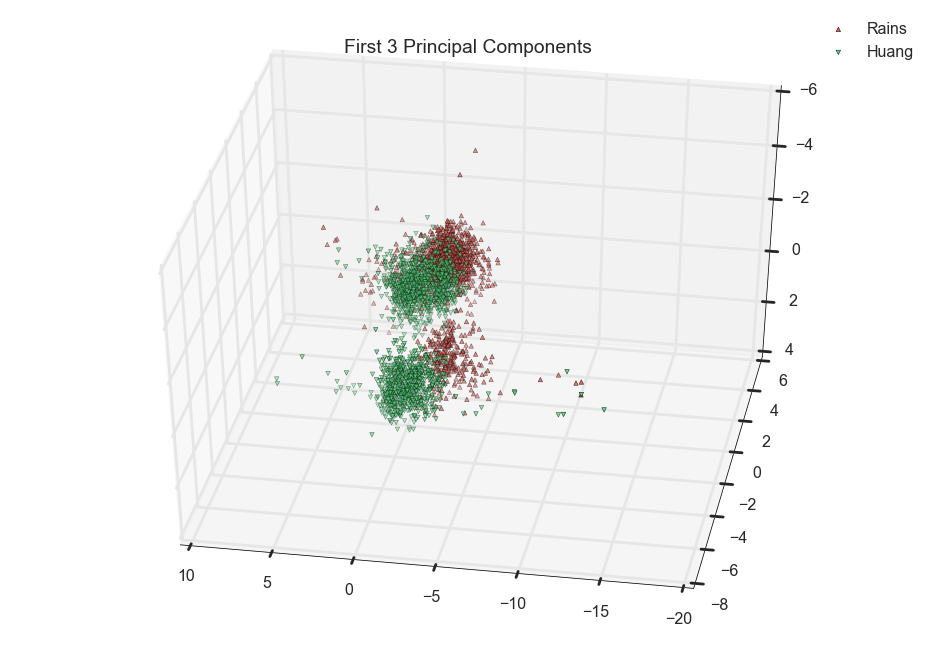

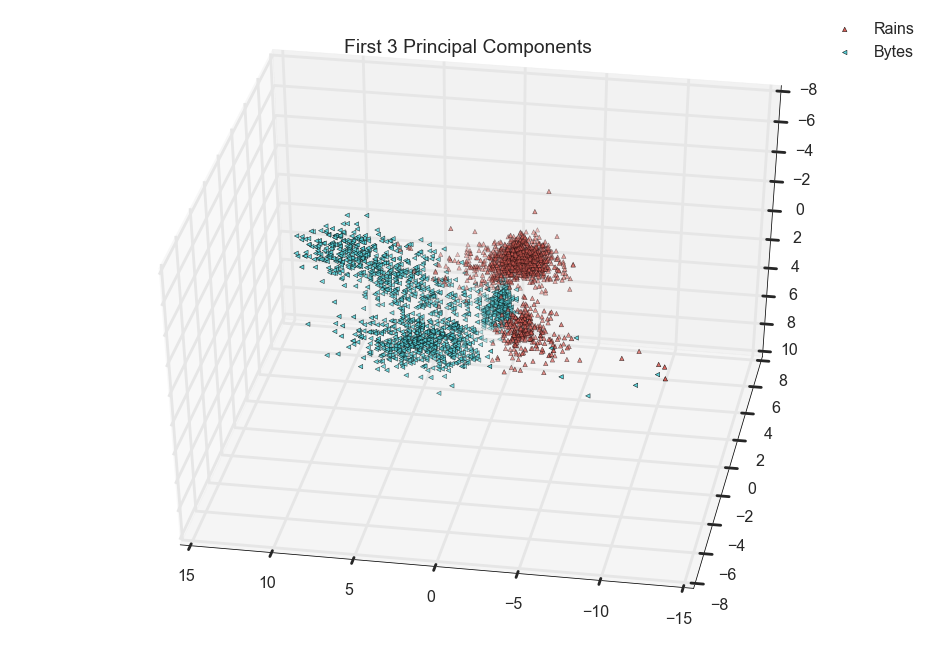

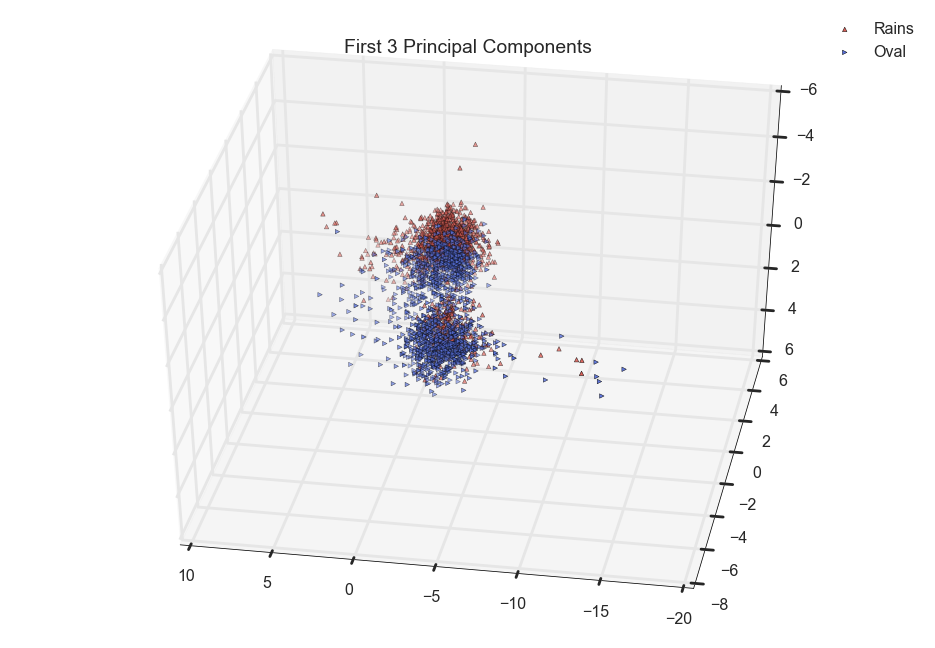

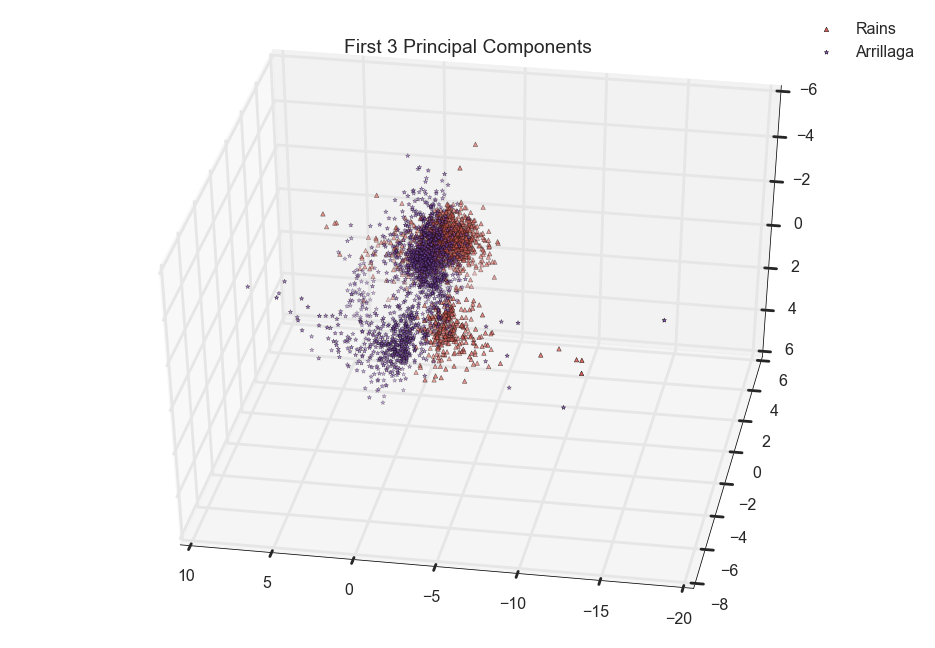

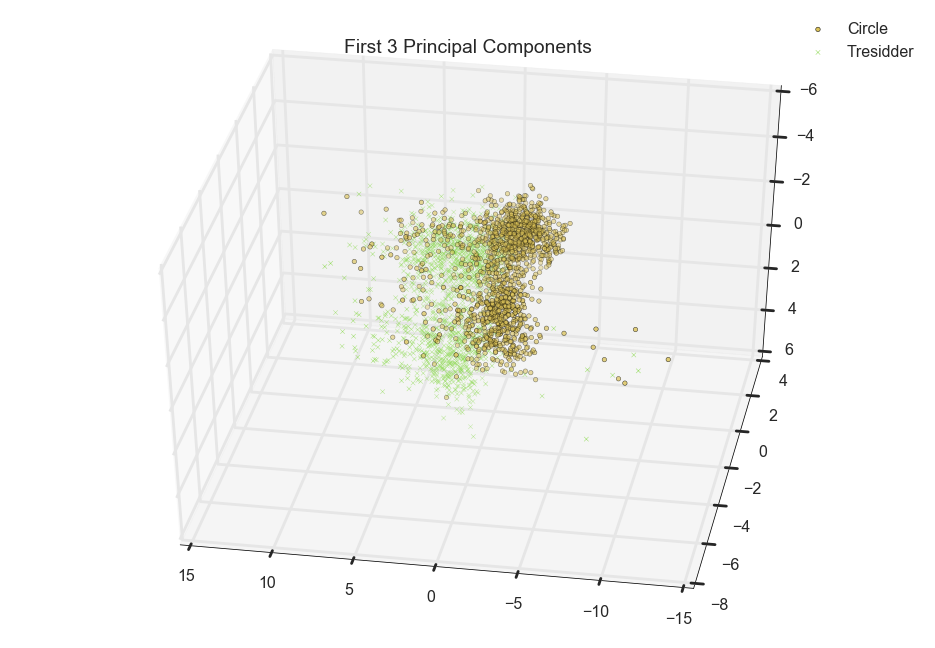

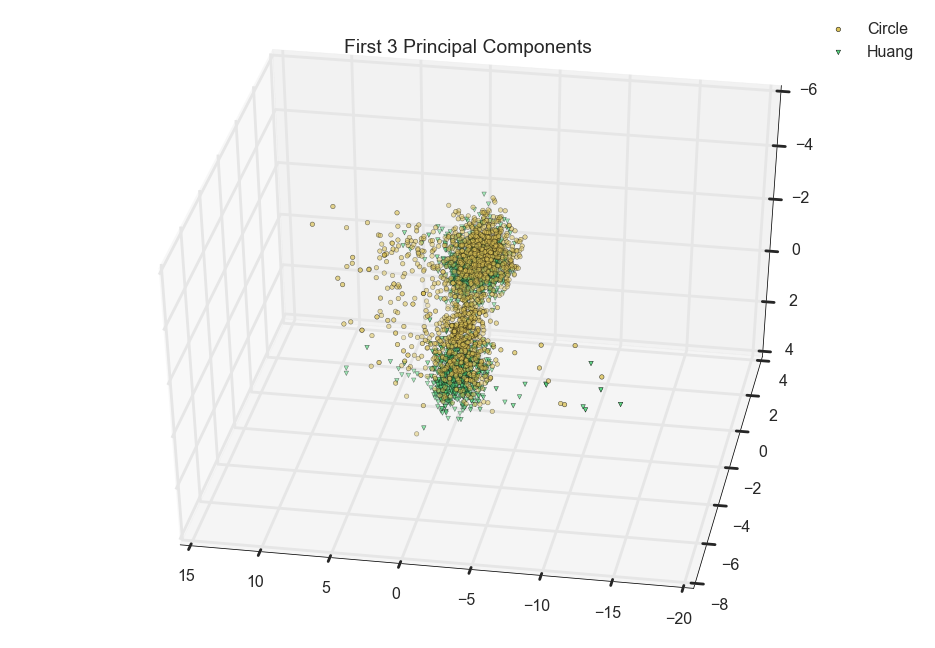

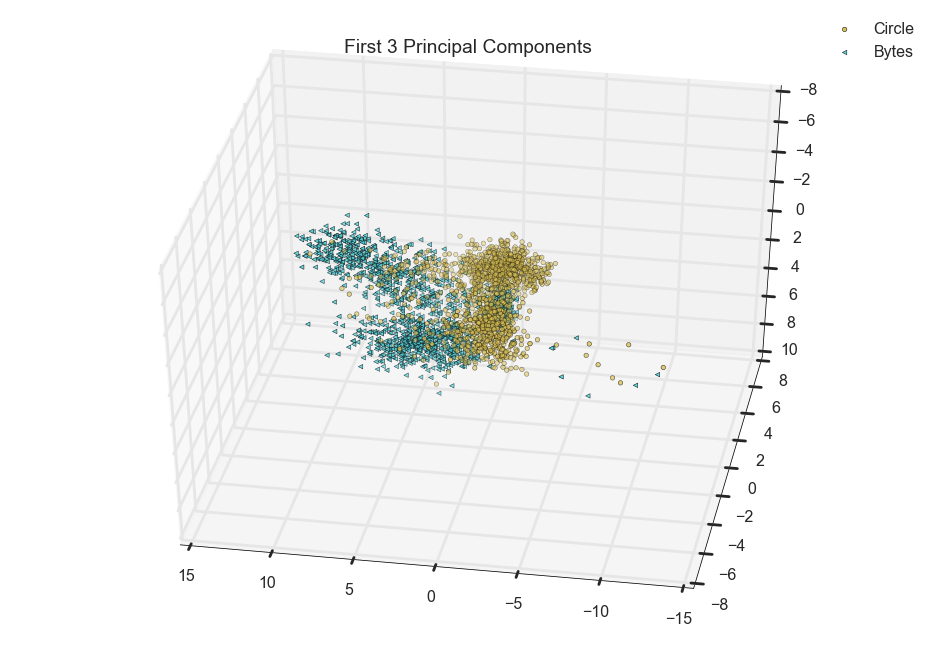

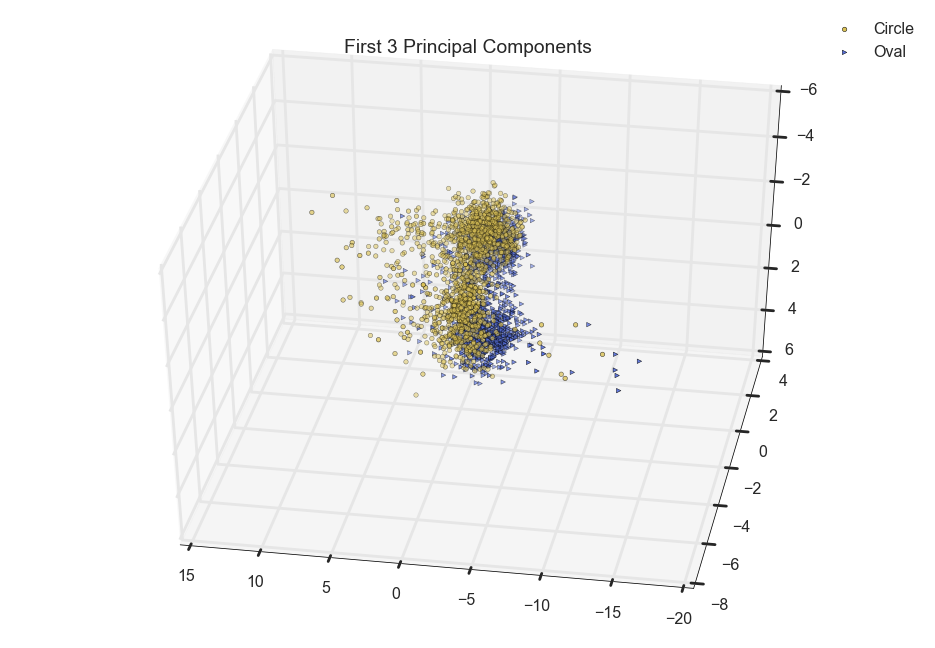

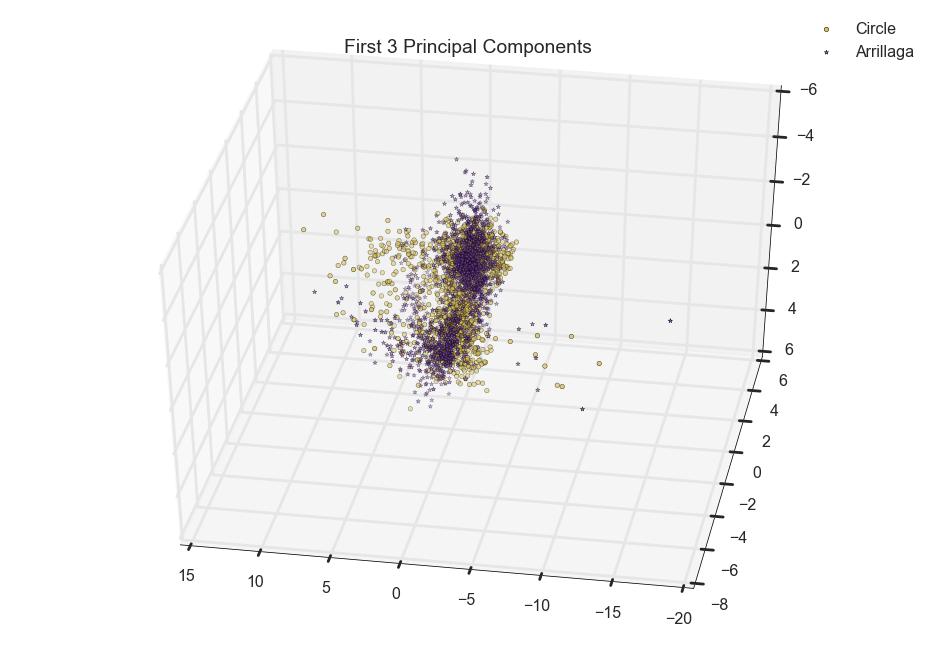

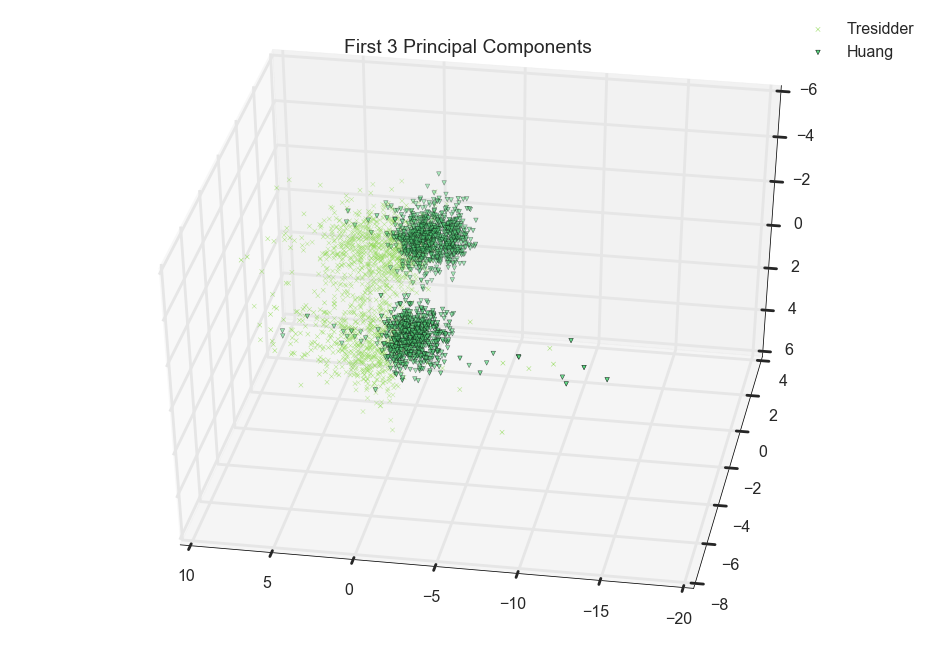

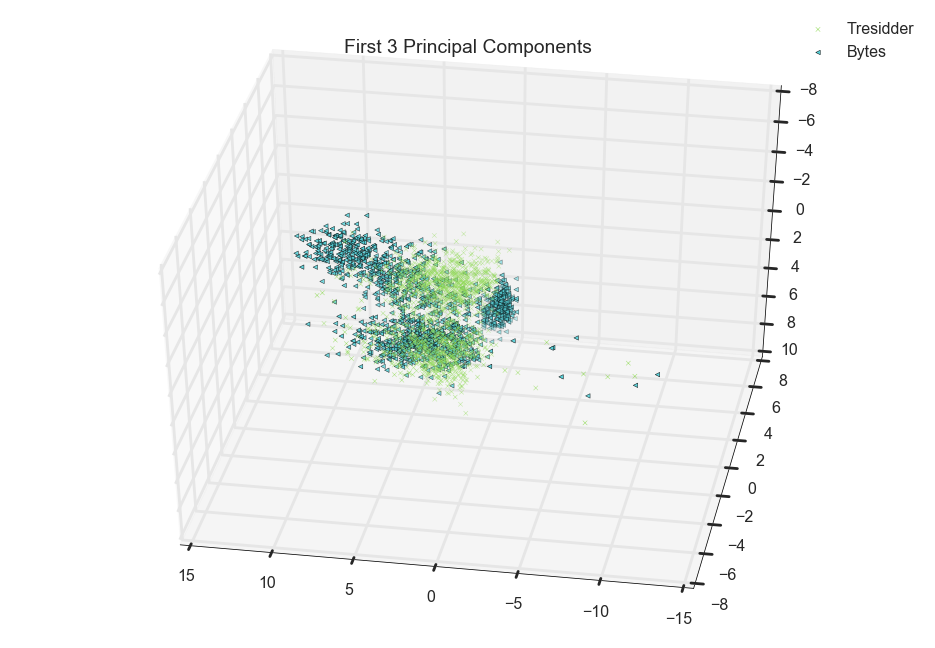

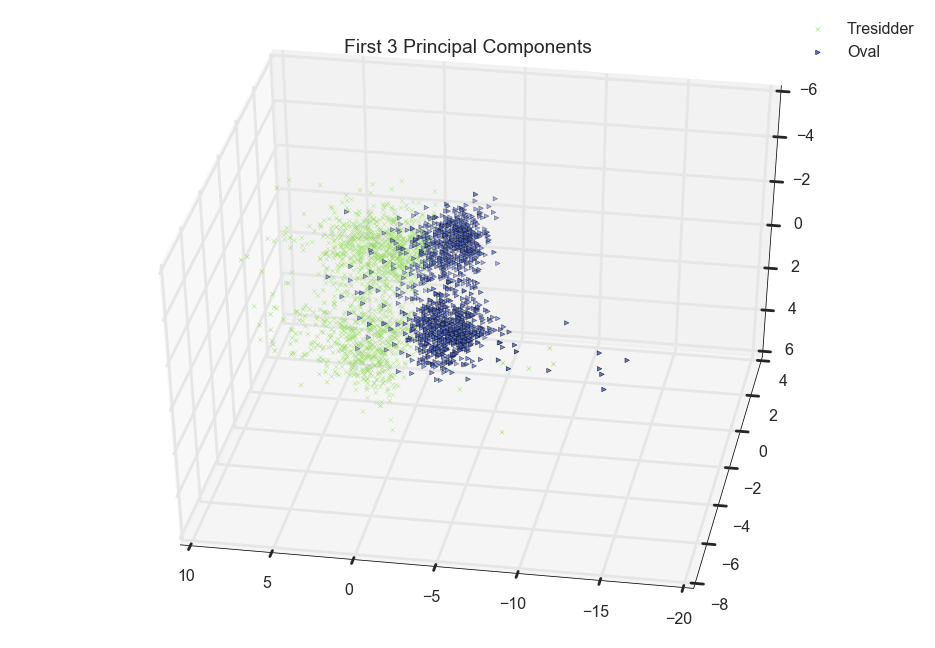

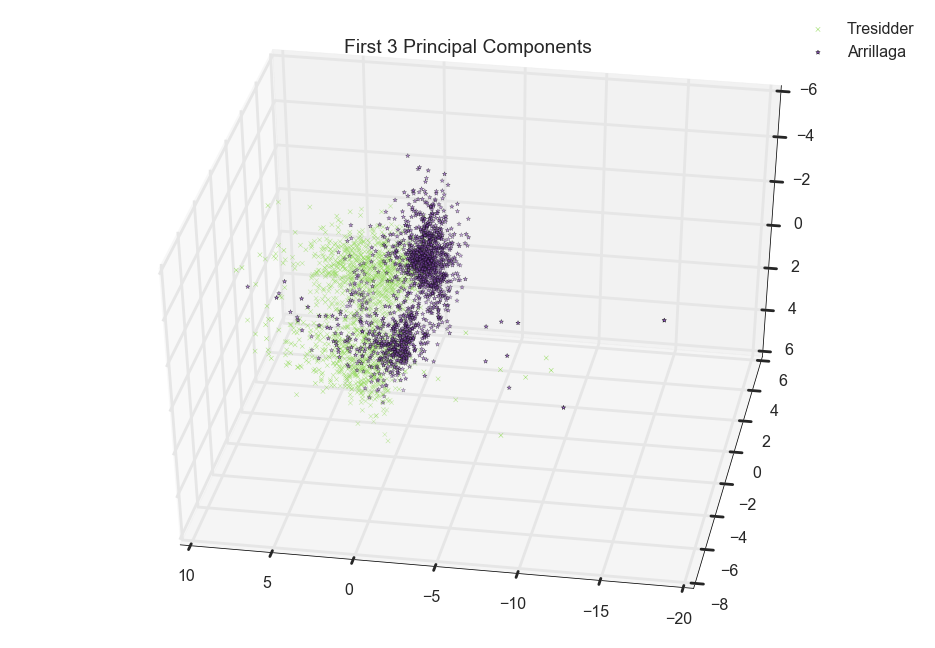

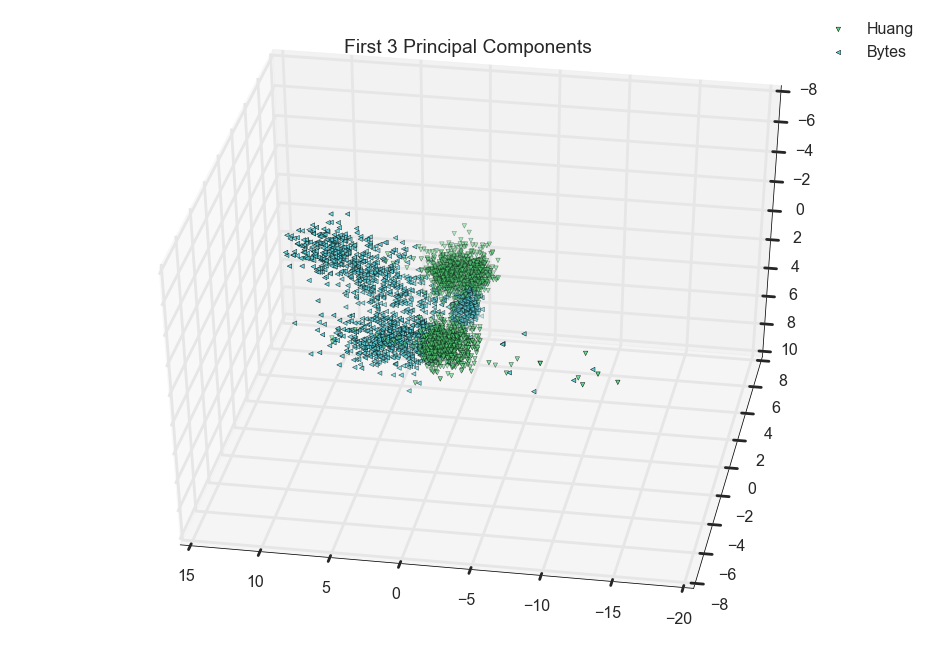

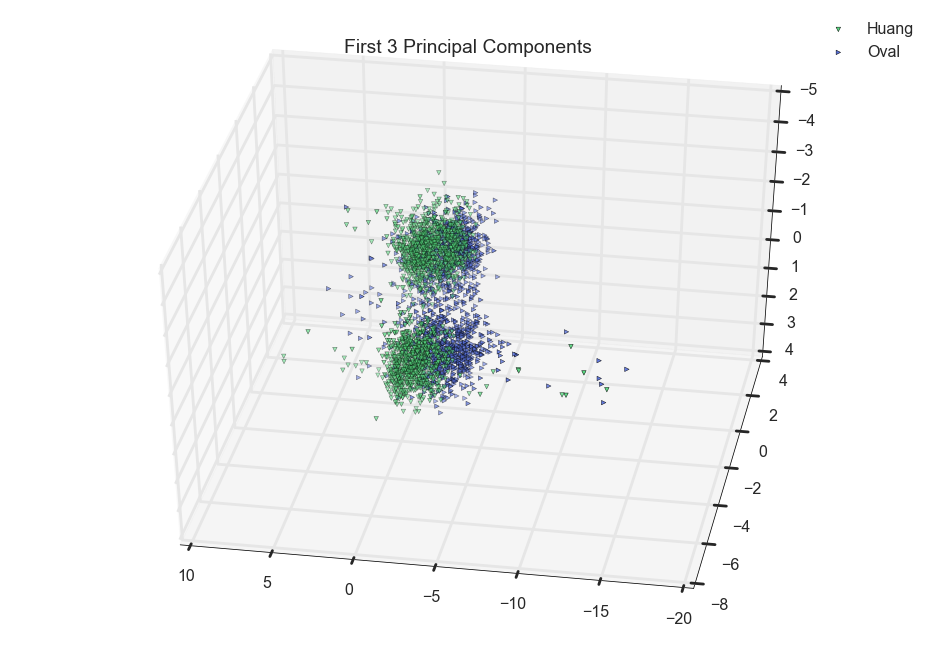

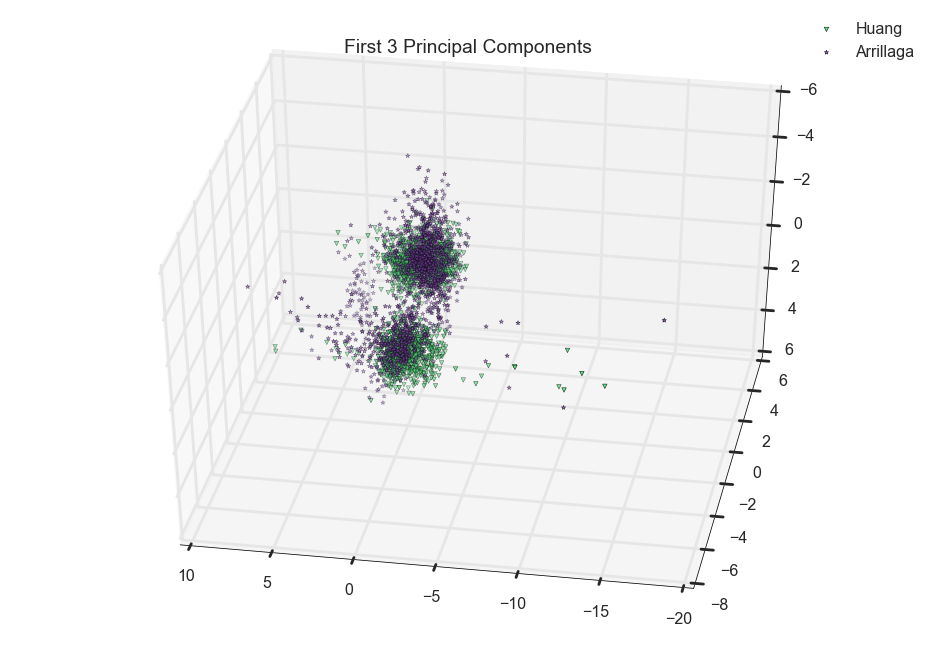

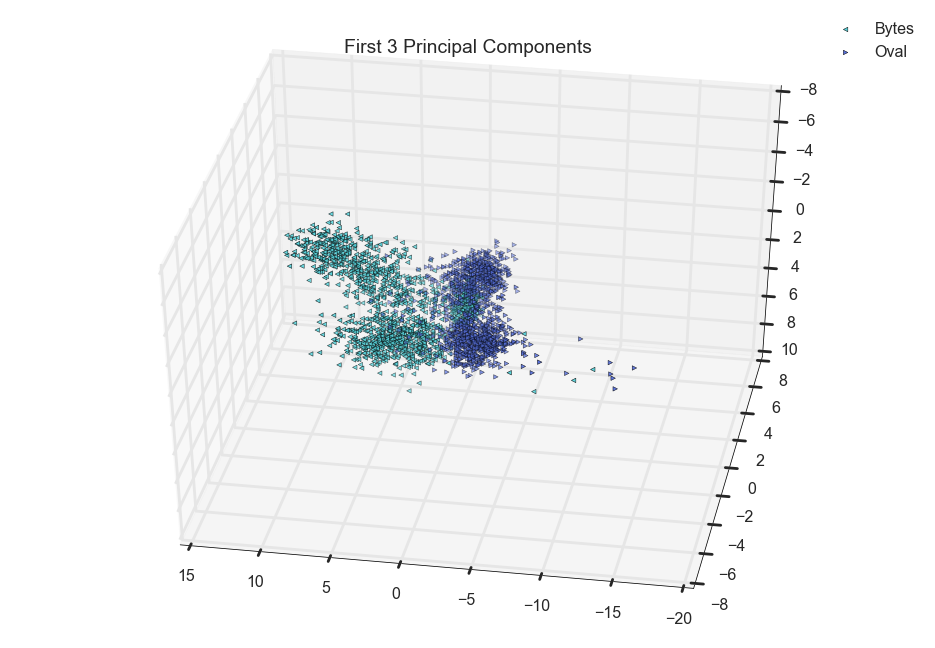

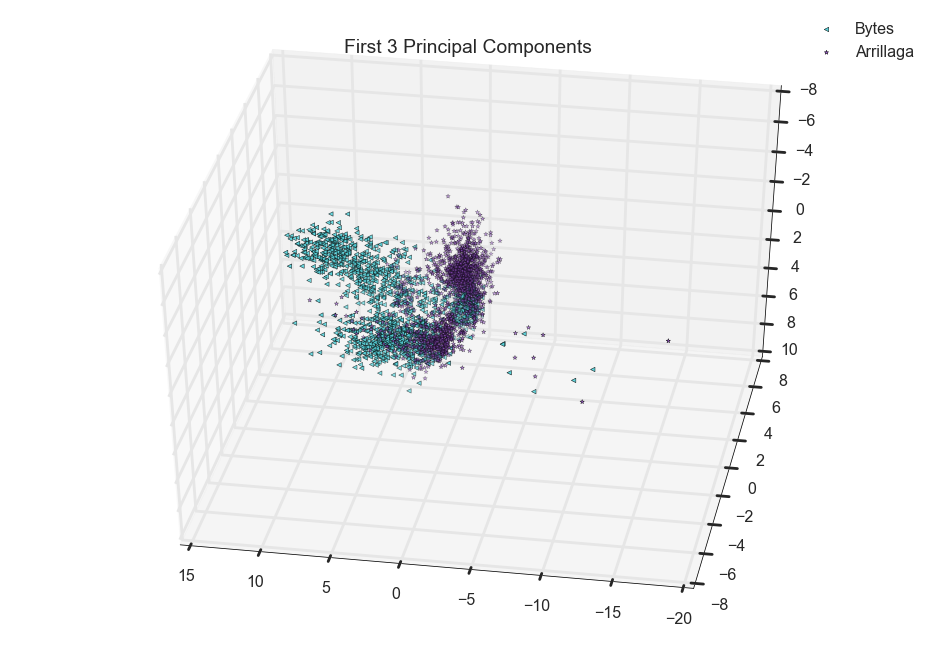

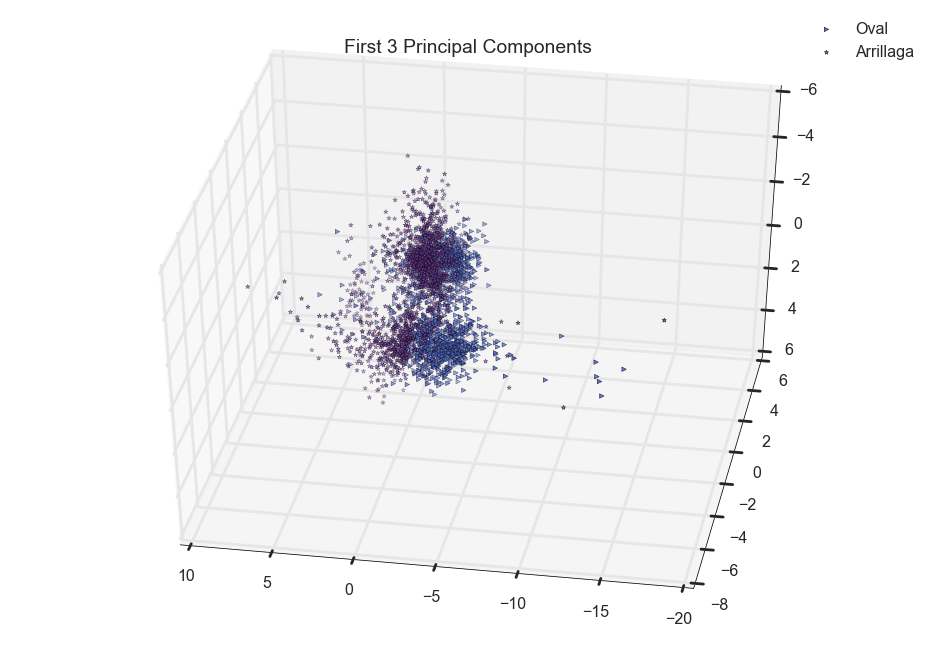

In [21]:
for i in range(7):
    for j in range(i,7):
        if i != j:
            plotRegions(samples.REGIONS,pca_df,i,j)

# Classifying using PCA Features

In [22]:
pca_X_sample = np.zeros((m,nsub,num_pcs))
pca_Y_sample = Y_compact
for i in range(m):
    for j in range(nsub):
        pca_X_sample[i,j,:] = X_pca[i*nsub+j,:num_pcs]
(pca_X_train,pca_Y_train,pca_X_test,pca_Y_test) = audiolearning.train_test_split_audio(pca_X_sample,pca_Y_sample)

In [23]:
class pcaPhi:
    LEN = num_pcs;
    raw_phi = None
    pca_obj = None
    def __init__(self,raw_phi,pca_obj):
        self.raw_phi = raw_phi
        self.pca_obj = pca_obj
    def get_phi(self,sample):
        '''
        Takes in a super_sample and returns a feature array. Breaks the super_sample
        down into samples. Each row of the returned value corresponds to a sample
        in the super sample.
        '''
        raw = self.raw_phi.get_phi(sample)

        return self.pca_obj.transform(raw)
my_pca_phi = pcaPhi(myPhi,pca)

In [24]:
svm_classifier = audiolearning.Classifier(my_pca_phi)
svm_classifier.trainSVMBatch(train_samples=None, X_train=pca_X_train,Y_train=pca_Y_train,C=0.6)

Finished Training Classifier with Training Error:---------------
Error for region 0: 0.0101
Error for region 1: 0.0943
Error for region 2: 0.0094
Error for region 3: 0.0000
Error for region 4: 0.0000
Error for region 5: 0.0920
Error for region 6: 0.0442
---- Total Training Error: 0.0340


0.03401360544217691

In [25]:
svm_classifier.testClassifier(test_samples=None,X_test=pca_X_test,Y_test=pca_Y_test)

-----------------------------------------------------
-------------------Testing Error:-------------------
Error for region 0: 0.0222
Error for region 1: 0.2500
Error for region 2: 0.0227
Error for region 3: 0.0408
Error for region 4: 0.0196
Error for region 5: 0.1333
Error for region 6: 0.0541
---- Total Testing Error: 0.0762


0.07619047619047614

In [26]:
from sklearn.cross_validation import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X_pca, Y)

In [27]:
from sklearn.grid_search import GridSearchCV
svm_tester = svm.SVC()
parameters = {"C":np.logspace(-3,3,7), "gamma":np.logspace(-3,3,7)}
fitmodel = GridSearchCV(svm_tester,param_grid=parameters,cv=5,scoring="accuracy")
fitmodel.fit(Xlr,ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 {'C': 10.0, 'gamma': 0.01},
 0.89612698412698411,
 [mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 0.001},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 0.01},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 0.10000000000000001},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 1.0},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 10.0},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 100.0},
  mean: 0.15581, std: 0.00014, params: {'C': 0.001, 'gamma': 1000.0},
  mean: 0.15784, std: 0.00133, params: {'C': 0.01, 'gamma': 0.001},
  mean: 0.55035, std: 0.00822, params: {'C': 0.01, 'gamma': 0.01},
  mean: 0.15581, std: 0.00014, params: {'C': 0.01, 'gamma': 0.10000000000000001},
  mean: 0.

In [28]:
C = fitmodel.best_params_['C']
gamma = fitmodel.best_params_['gamma']

In [29]:
svm_classifier_grid = audiolearning.Classifier(my_pca_phi)
svm_classifier_grid.trainSVMBatch(train_samples=None, X_train=pca_X_train,Y_train=pca_Y_train,C=C,gamma=gamma)

Finished Training Classifier with Training Error:---------------
Error for region 0: 0.0000
Error for region 1: 0.0094
Error for region 2: 0.0000
Error for region 3: 0.0000
Error for region 4: 0.0000
Error for region 5: 0.0230
Error for region 6: 0.0000
---- Total Training Error: 0.0041


0.004081632653061273

In [30]:
(err, conf_mat) = svm_classifier.testClassifier(test_samples=None,X_test=pca_X_test,Y_test=pca_Y_test,get_conf_mat=True)

-----------------------------------------------------
-------------------Testing Error:-------------------
Error for region 0: 0.0222
Error for region 1: 0.2727
Error for region 2: 0.0227
Error for region 3: 0.0612
Error for region 4: 0.0196
Error for region 5: 0.1333
Error for region 6: 0.0541
---- Total Testing Error: 0.0825


In [32]:
conf_mat

array([[44,  0,  0,  0,  0,  1,  0],
       [ 2, 32,  1,  3,  2,  4,  0],
       [ 0,  1, 43,  0,  0,  0,  0],
       [ 1,  1,  0, 46,  0,  1,  0],
       [ 0,  0,  1,  0, 50,  0,  0],
       [ 3,  2,  0,  0,  0, 39,  1],
       [ 0,  1,  1,  0,  0,  0, 35]])

In [47]:
tree_classifier_grid = audiolearning.Classifier(my_pca_phi)
tree_classifier_grid.trainDecisionTreeBatch(train_samples=None, X_train=pca_X_train,Y_train=pca_Y_train,max_depth=200,max_leaf_nodes=100)

Finished Training Classifier with Training Error:---------------
Error for region 0: 0.1717
Error for region 1: 0.2170
Error for region 2: 0.1226
Error for region 3: 0.0885
Error for region 4: 0.0541
Error for region 5: 0.2414
Error for region 6: 0.1504
---- Total Training Error: 0.1456


0.145578231292517

In [48]:
tree_classifier_grid.testClassifier(test_samples=None,X_test=pca_X_test,Y_test=pca_Y_test,get_conf_mat=True)

-----------------------------------------------------
-------------------Testing Error:-------------------
Error for region 0: 0.2667
Error for region 1: 0.4091
Error for region 2: 0.1364
Error for region 3: 0.1837
Error for region 4: 0.0980
Error for region 5: 0.3556
Error for region 6: 0.2973
---- Total Testing Error: 0.2444


(0.24444444444444446, array([[33,  3,  0,  1,  0,  8,  0],
        [ 1, 26,  2,  6,  2,  6,  1],
        [ 0,  1, 38,  2,  3,  0,  0],
        [ 3,  1,  0, 40,  1,  4,  0],
        [ 0,  0,  5,  0, 46,  0,  0],
        [ 5, 11,  0,  0,  0, 29,  0],
        [ 0,  6,  3,  0,  1,  1, 26]]))

In [72]:
dt_tester = tree.DecisionTreeClassifier()
parameters = {"max_depth":np.arange(1,110,11), "max_leaf_nodes":np.arange(2,110,11), "criterion":["gini","entropy"]}
fitmodel = GridSearchCV(dt_tester,param_grid=parameters,cv=5,scoring="accuracy")
fitmodel.fit(Xlr,ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=67,
             max_features=None, max_leaf_nodes=101, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'criterion': 'gini', 'max_depth': 67, 'max_leaf_nodes': 101},
 0.61136173767752711,
 [mean: 0.29373, std: 0.00276, params: {'max_leaf_nodes': 2, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: {'max_leaf_nodes': 13, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: {'max_leaf_nodes': 24, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: {'max_leaf_nodes': 35, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: {'max_leaf_nodes': 46, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: {'max_leaf_nodes': 57, 'criterion': 'gini', 'max_depth': 1},
  mean: 0.42590, std: 0.01113, params: 

In [109]:
dt_tester = ensemble.RandomForestClassifier()
parameters = {"n_estimators":np.arange(1,1000,500), "max_features":np.arange(1,num_pcs,25)}
fitmodel = GridSearchCV(dt_tester,param_grid=parameters,cv=5,scoring="accuracy")
fitmodel.fit(Xlr,ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=26, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 {'max_features': 26, 'n_estimators': 501},
 0.79598997493734336,
 [mean: 0.31078, std: 0.01046, params: {'max_features': 1, 'n_estimators': 1},
  mean: 0.79415, std: 0.01259, params: {'max_features': 1, 'n_estimators': 501},
  mean: 0.54302, std: 0.02725, params: {'max_features': 26, 'n_estimators': 1},
  mean: 0.79599, std: 0.00896, params: {'max_features': 26, 'n_estimators': 501}])

In [100]:
rf_clf = audiolearning.Classifier(my_pca_phi)
rf_clf.trainRandomForestBatch(train_samples=None, X_train=pca_X_train,Y_train=pca_Y_train,n_estimators=100,max_features=20,n_jobs=-1)

Finished Training Classifier with Training Error:---------------
Error for region 0: 0.0000
Error for region 1: 0.0000
Error for region 2: 0.0000
Error for region 3: 0.0000
Error for region 4: 0.0000
Error for region 5: 0.0000
Error for region 6: 0.0000
---- Total Training Error: 0.0000


0.0

In [101]:
rf_clf.testClassifier(test_samples=None,X_test=pca_X_test,Y_test=pca_Y_test,get_conf_mat=True)[1]

-----------------------------------------------------
-------------------Testing Error:-------------------
Error for region 0: 0.1071
Error for region 1: 0.5152
Error for region 2: 0.2632
Error for region 3: 0.1556
Error for region 4: 0.1316
Error for region 5: 0.1250
Error for region 6: 0.2727
---- Total Testing Error: 0.2259


array([[25,  1,  0,  0,  0,  2,  0],
       [ 2, 16,  3,  5,  2,  3,  2],
       [ 0,  0, 28,  0, 10,  0,  0],
       [ 2,  5,  0, 38,  0,  0,  0],
       [ 0,  1,  4,  0, 33,  0,  0],
       [ 2,  0,  1,  0,  0, 21,  0],
       [ 0,  5,  2,  0,  2,  0, 24]])

In [60]:
bdt_clf = audiolearning.Classifier(my_pca_phi)
bdt_clf.trainBoostedDecisionStump(train_samples=None, X_train=pca_X_train,Y_train=pca_Y_train,n_estimators=20000,learning_rate=1.5)

Finished Training Classifier with Training Error:---------------
Error for region 0: 0.0505
Error for region 1: 0.2642
Error for region 2: 0.0755
Error for region 3: 0.0619
Error for region 4: 0.0000
Error for region 5: 0.0920
Error for region 6: 0.0531
---- Total Training Error: 0.0844


0.08435374149659869

In [62]:
bdt_clf.testClassifier(test_samples=None,X_test=pca_X_test,Y_test=pca_Y_test,get_conf_mat=True)[1]

-----------------------------------------------------
-------------------Testing Error:-------------------
Error for region 0: 0.1111
Error for region 1: 0.3182
Error for region 2: 0.1136
Error for region 3: 0.2449
Error for region 4: 0.1176
Error for region 5: 0.3111
Error for region 6: 0.1892
---- Total Testing Error: 0.2000


array([[40,  4,  0,  0,  0,  1,  0],
       [ 2, 30,  1,  0,  2,  9,  0],
       [ 0,  2, 39,  0,  3,  0,  0],
       [ 3,  3,  0, 37,  1,  5,  0],
       [ 0,  2,  4,  0, 45,  0,  0],
       [ 6,  7,  0,  0,  0, 31,  1],
       [ 0,  5,  2,  0,  0,  0, 30]])

In [8]:
Y.shape

(10500L,)